In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [8]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Данные:
Будем работать с датасетом [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 

In [2]:
import os
import struct
import numpy as np
 
def load_mnist(path, which='train'):
 
    if which == 'train':
        labels_path = os.path.join(path, 'train-labels-idx1-ubyte')
        images_path = os.path.join(path, 'train-images-idx3-ubyte')
    elif which == 'test':
        labels_path = os.path.join(path, 't10k-labels-idx1-ubyte')
        images_path = os.path.join(path, 't10k-images-idx3-ubyte')
    else:
        raise AttributeError('`which` must be "train" or "test"')
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, n, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

In [3]:
X_train, y_train = load_mnist(path = '../../Data/f-mnist/', which='train')
X_test, y_test = load_mnist(path = '../../Data/f-mnist/', which='test')


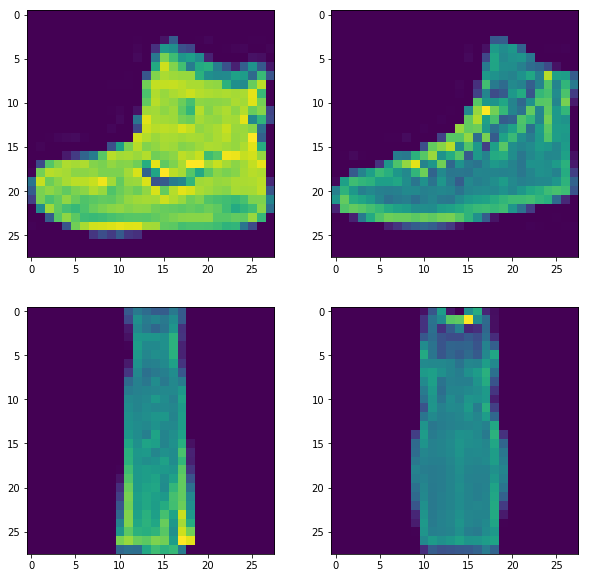

In [4]:
f = plt.figure(figsize=(10, 10))

ax = plt.subplot(2, 2, 1)
ax.imshow(X_train[0].reshape([28,28]))

ax = plt.subplot(2, 2, 2)
i = np.random.randint(0, X_train.shape[0], 1)
ax.imshow(X_train[i].reshape([28,28]))

ax = plt.subplot(2, 2, 3)
i = np.random.randint(0, X_train.shape[0], 1)
ax.imshow(X_train[i].reshape([28,28]))

ax = plt.subplot(2, 2, 4)
i = np.random.randint(0, X_train.shape[0], 1)
ax.imshow(X_train[i].reshape([28,28]))


In [67]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

def plot_means_std(results, steps, labels=None, xlabel='X', figsize=(15, 10)):
    
    f, ax = plt.subplots(2, 1, figsize=(10, 16))
    results = np.array(results)
    
    if len(results.shape) == 2:
        results = results[np.newaxis, :]
    
    for i, result in enumerate(results):
        
        means = result.mean(axis=1)
        stds = result.std(axis=1)
        if labels is not None:
            label = labels[i]
        else:
            label = 'None'
    
        ax[0].plot(steps, means, '-', ms=10, label=label)
        ax[0].fill_between(steps, means - stds, means + stds, alpha=0.2)
        ax[1].plot(steps, stds**2, label=label)
    
    ax[0].set_title('Means with stds')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel('Accuracy score')
    if labels is not None:
        ax[0].legend()
    
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel('Variance score')
    if labels is not None:
        ax[1].legend()
    
    plt.ticklabel_format(axis='y',style='sci',scilimits=(1,3))
    plt.show()

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [6]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.5682

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

In [7]:
X_train.shape

(60000, 784)

## Depends on number of PCA components 

In [8]:
### Your code here

#pca_steps = [3, 5, 7, 12, 18, 25, 33, 40, 48, 55]
pca_steps = np.arange(2, 80, 3)
n_repeat = 10

results = []
for pca_step in tqdm(pca_steps):
    result_step = []
    for i in range(n_repeat):
        
        pca = PCA(n_components=pca_step)
        used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
        X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
        
        lr = LogisticRegression()
        lr.fit(X_train_lowdim, y_train[used_indices])
        
        acc = accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))
        result_step.append(acc)
    results.append(result_step)

100%|██████████| 26/26 [1:22:58<00:00, 191.47s/it]


In [9]:
results = np.array(results)

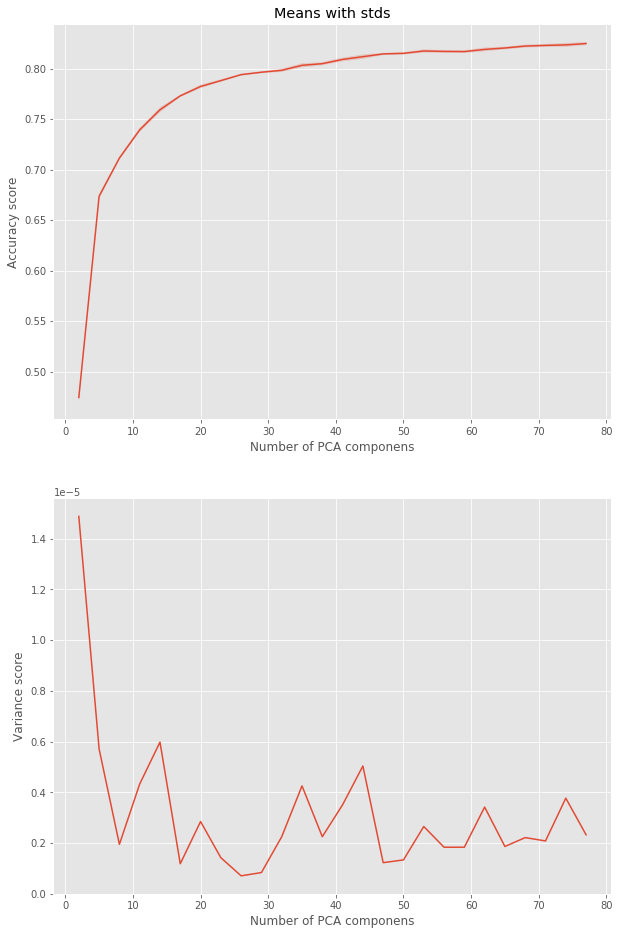

In [12]:
plot_means_std(results, pca_steps, xlabel='Number of PCA componens')

## Depends on number of test size

In [15]:
### Your code here

steps = np.hstack([np.arange(10, 200, 20),
                   np.arange(200, 1000, 50),
                   np.arange(1000, 2000, 100)])
n_repeat = 6

results = []
for step in tqdm(steps):
    result_step = []
    for i in range(n_repeat):
        
        used_indices = np.random.choice(np.arange(X_train.shape[0]), step, replace=False)
        
        lr = LogisticRegression()
        lr.fit(X_train[used_indices].reshape([-1, 784]), y_train[used_indices])
        
        acc = accuracy_score(y_test, lr.predict(X_test.reshape([-1, 784])))
        result_step.append(acc)
    results.append(result_step)

100%|██████████| 36/36 [03:59<00:00,  6.64s/it]


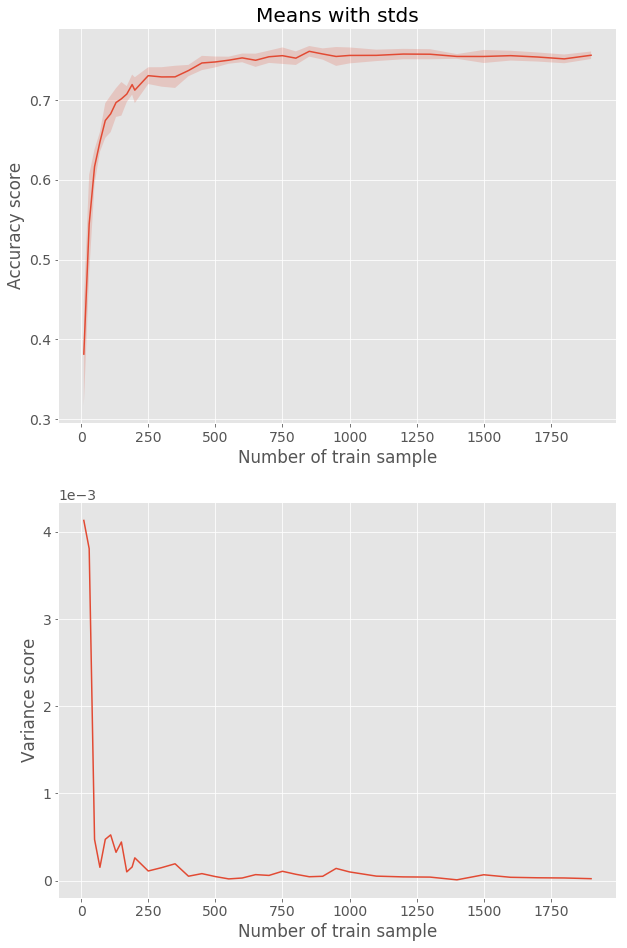

In [16]:
plot_means_std(results, steps, xlabel='Number of train sample')

## Depends on number of test size

In [43]:
### Your code here

steps = np.arange(5, 101, 5) / 100
n_sample = 1000
n_repeat = 6

results = []
for step in tqdm(steps):
    result_step = []
    for i in range(n_repeat):
        
        used_indices = np.random.choice(np.arange(X_train.shape[0]), n_sample, replace=False)
        used_feature = np.random.choice(np.arange(784), int(784 * step), replace=False)
        
        lr = LogisticRegression()
        lr.fit(X_train[used_indices].reshape([-1, 784])[:,used_feature], y_train[used_indices])
        
        acc = accuracy_score(y_test, lr.predict(X_test.reshape([-1, 784])[:,used_feature]))
        result_step.append(acc)
    results.append(result_step)

100%|██████████| 20/20 [02:39<00:00,  7.98s/it]


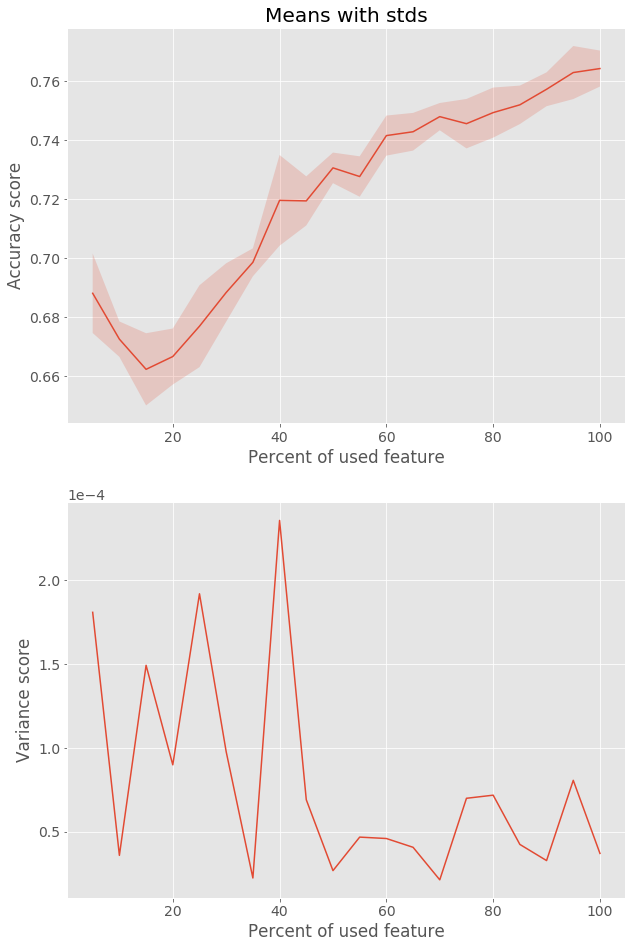

In [44]:
plot_means_std(results, steps * 100, xlabel='Percent of used feature')

## Depends on number of test size

In [74]:
### Your code here

steps = np.arange(5, 101, 5) / 100
steps_n_samples = [100, 300, 700, 1000]
n_repeat = 6

results_all = []
for n_sample in steps_n_samples:
    results = []
    for step in tqdm(steps, desc=str(n_sample)):
        result_step = []
        for i in range(n_repeat):

            used_indices = np.random.choice(np.arange(X_train.shape[0]), n_sample, replace=False)
            used_feature = np.random.choice(np.arange(784), int(784 * step), replace=False)

            lr = LogisticRegression()
            lr.fit(X_train[used_indices].reshape([-1, 784])[:,used_feature], y_train[used_indices])

            acc = accuracy_score(y_test, lr.predict(X_test.reshape([-1, 784])[:,used_feature]))
            result_step.append(acc)
        results.append(result_step)
    results_all.append(results)

1000: 100%|██████████| 20/20 [02:36<00:00,  7.85s/it]


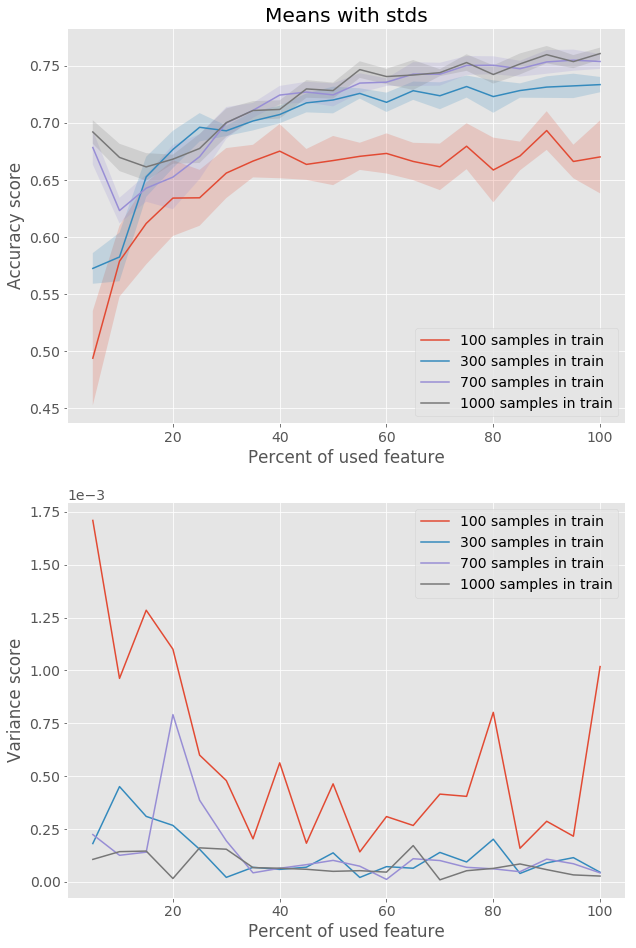

In [75]:
plot_means_std(results_all, steps * 100,
               labels = ['{} samples in train'.format(i) for i in steps_n_samples],
               xlabel='Percent of used feature')